<a href="https://colab.research.google.com/github/woodskd24/MentalHealthinUSA/blob/main/Anxiety_disorders_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Data From https://data.world/vizzup/mental-health-depression-disorder-data/workspace/file?filename=Mental+health+Depression+disorder+Data.xlsx
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/MHPred.csv')
df

,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,1990,0.340897,0.653706,0.468676,6.576884,2.367794,4.677591,2.173751
1,1991,0.338913,0.653953,0.473575,6.553351,2.345466,4.660871,2.139292
2,1992,0.337343,0.654205,0.478610,6.536143,2.339515,4.651949,2.107931
3,1993,0.336207,0.654431,0.483539,6.525536,2.347095,4.648701,2.080669
4,1994,0.335536,0.654620,0.488235,6.522278,2.365738,4.649294,2.058632
5,1995,0.335363,0.654721,0.492368,6.526489,2.392582,4.650869,2.042931
6,1996,0.335806,0.654749,0.496752,6.578023,2.456048,4.662902,2.033987
7,1997,0.336797,0.654720,0.501560,6.688847,2.564591,4.689154,2.030590
8,1998,0.338085,0.654658,0.506483,6.818473,2.688823,4.720716,2.031176
9,1999,0.339410,0.654564,0.511072,6.926351,2.800595,4.749991,2.034175


In [5]:
X = df[['Year']]
y = df['Anxiety disorders (%)']

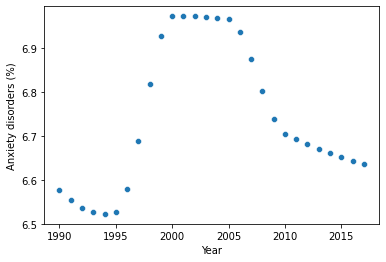

In [6]:
sns.scatterplot(x = "Year", y = "Anxiety disorders (%)", data = df)

#Weka

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
import xgboost as xgb
from scipy.stats import uniform, randint

In [9]:
xgb = xgb.XGBRegressor(objective="reg:linear", random_state=42)

x1 = xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)])

y_pred1 = x1.predict(X_test)

[16:50:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.66728
[1]	validation_0-rmse:5.13151
[2]	validation_0-rmse:4.64667
[3]	validation_0-rmse:4.20792
[4]	validation_0-rmse:3.81091
[5]	validation_0-rmse:3.45166
[6]	validation_0-rmse:3.12659
[7]	validation_0-rmse:2.83247
[8]	validation_0-rmse:2.56635
[9]	validation_0-rmse:2.32558
[10]	validation_0-rmse:2.10777
[11]	validation_0-rmse:1.91074
[12]	validation_0-rmse:1.73253
[13]	validation_0-rmse:1.57134
[14]	validation_0-rmse:1.42559
[15]	validation_0-rmse:1.29382
[16]	validation_0-rmse:1.1747
[17]	validation_0-rmse:1.06705
[18]	validation_0-rmse:0.969798
[19]	validation_0-rmse:0.881966
[20]	validation_0-rmse:0.802677
[21]	validation_0-rmse:0.731137
[22]	validation_0-rmse:0.666628
[23]	validation_0-rmse:0.604009
[24]	validation_0-rmse:0.547399
[25]	validation_0-rmse:0.496265
[26]	validation_0-rmse:0.450124
[27]	validation_0-rmse:0.408931
[28]	v

In [10]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred1)
meanSqErr = metrics.mean_squared_error(y_test, y_pred1)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred1))
print('R squared: {:.2f}'.format(x1.score(X_train,y_train)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 99.98
Mean Absolute Error: 0.031914021664794845
Mean Square Error: 0.0021878340073026538
Root Mean Square Error: 0.04677428788664402


In [11]:
print("Prediction for test set: {}".format(y_pred1))

Prediction for test set: [6.6502337 6.8012424 6.8012424 6.8012424 6.96446   6.5261326 6.670554
 6.968421  6.670554 ]


In [12]:
xG_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred1})
xG_diff.head()

,Actual value,Predicted value
24,6.660473,6.650234
17,6.875454,6.801242
19,6.737790,6.801242
20,6.704455,6.801242
14,6.968875,6.964460


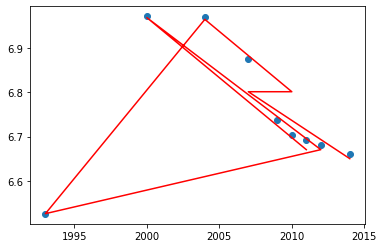

In [13]:
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred1, 'Red')
plt.show()